In [1]:
import sys
sys.path.append("../../mypkg")
from constants import RES_ROOT, FIG_ROOT, DATA_ROOT

In [2]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from utils.misc import get_cpt_ts
plt.style.use(FIG_ROOT/"base.mplstyle")
%matplotlib inline

In [18]:

def _get_cpt_ts_wrapper(length, ncpt, margin_size=None, mean_diff_sd=10, err_sd=1):
    """
    Generate a time series with change points.

    Parameters:
    - length (int): Length of the time series.
    - ncpt (int): Number of change points.
    - margin_size (int, optional): Size of the margin around the time series where change points cannot occur. If not provided, it is set to 10% of the length.
    - mean_diff_sd (float, optional): Standard deviation of the mean differences between segments. Default is 10.
    - err_sd (float, optional): Standard deviation of the error term. Default is 1.

    Returns:
    - ts (numpy.ndarray): Generated time series with change points.
    """
    if margin_size is None:
        margin_size = int(length*0.1)
    cpts = np.sort(npr.choice(np.arange(1+margin_size, length-margin_size), size=ncpt, replace=False))
    if ncpt >= 2:
        while np.diff(cpts).min() < margin_size:
            cpts = np.sort(npr.choice(np.arange(1+margin_size, length-margin_size), size=ncpt, replace=False))
        
    mean_diff = np.abs(npr.randn(ncpt))*mean_diff_sd + 5
    mean_diff = mean_diff * (-1)**np.arange(ncpt)
    ts = get_cpt_ts(mean_diff, cpts, err_sd, length=length)
    return ts

[] []


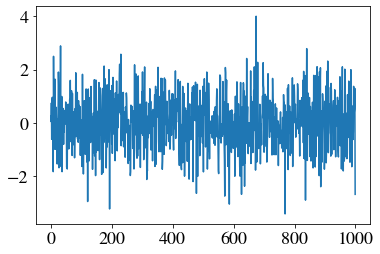

In [19]:
length = 100
ncpt = 5
margin_size = 10
mean_diff_sd = 10
err_sd = 1



ts = _get_cpt_ts_wrapper(length=1000, ncpt=0)
plt.plot(ts)